In [2]:
import pandas as pd
import numpy as np
import torch
%load_ext autoreload

%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
df = pd.read_hdf("data/train.h5", key='table')

In [4]:
df.head()

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,...,E_199,PX_199,PY_199,PZ_199,truthE,truthPX,truthPY,truthPZ,ttv,is_signal_new
954,266.676880,85.227501,-227.714478,109.539703,145.654129,46.856384,-124.277214,59.789429,76.116646,24.653267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
957,385.807739,82.459038,303.009888,-224.127502,107.484184,15.370172,85.792786,-62.898380,69.148743,14.434706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
959,144.535309,-108.092529,93.247643,-22.612755,70.963295,-21.669872,46.335262,-49.185867,56.287312,-19.737480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
970,82.668480,49.805248,-9.679499,-65.267319,58.262596,38.636459,-7.670141,-42.929283,59.068157,37.110703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
979,406.581726,186.811081,-345.960571,103.545181,42.170246,19.375856,-35.882679,10.739602,36.417843,12.717323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0


In [16]:
df['is_signal_new'].values.shape

(1211000,)

In [5]:
df.shape

(403000, 806)

In [17]:
def _col_list(prefix, max_particles=200):
    return ['%s_%d'%(prefix,i) for i in range(max_particles)]
    
_px = df[_col_list('PX')].values
_py = df[_col_list('PY')].values
_pz = df[_col_list('PZ')].values
_e = df[_col_list('E')].values

mask = _e>0
n_particles = np.sum(mask, axis=1)

In [19]:
().sum(-1)

array([23, 43, 41, 25, 73, 55, 53, 70, 27, 64, 89, 28, 71, 29, 40, 22, 41,
       43, 13, 25, 57, 32, 76, 57, 27, 16, 23, 50, 40, 44, 42, 42, 25, 65,
       21, 44, 61, 23, 32, 26, 53, 47, 55, 67, 54, 36, 81, 62, 62, 66, 13,
       45, 68, 23, 69, 30, 30, 34, 49, 34, 48, 65, 41, 78, 41, 32, 81, 50,
       52, 60, 57, 39, 54, 57, 73, 53, 77, 90, 48, 59, 53, 67, 49, 43, 49,
       52, 39, 55, 39, 37, 21, 33, 21, 44, 25, 48, 56, 21, 44, 36])

In [21]:
_e[0,21:40]

array([1.0327688, 0.4266541, 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       ], dtype=float32)

/home/marc/anaconda3/envs/freshenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


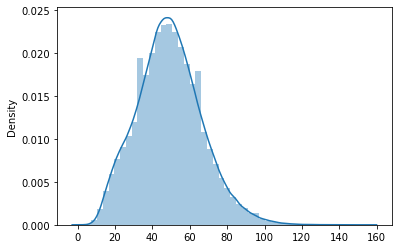

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(n_particles)
plt.show()

In [7]:
df['is_signal_new'].mean()

0.4999925558312655

In [8]:
from emlp.equivariant_subspaces import *

In [10]:
repin = 2*Scalar+3*Vector+T(1,2) + Matrix+Vector
repout = T(2,1)+2*Vector+ 3*Scalar+Quad
gens = [np.array([[0,-1],[1,0]])]
# active_dims,P = matrix_active_subspaces(gens,repout,repin)
# params = torch.randn(active_dims).cuda()
# W = P(params).cuda()

In [11]:
repsize(repin,2),repsize(repout,2)

(22, 19)

In [13]:
#W.shape

In [14]:

s = torch.randn(2,4).float()

v = torch.randn(2,repsize(repout,2))

In [15]:
indices = torch.tensor([0,0,0,0,0,0,0,0,1,1,2,2,0,0,0,3,3,3,3])

In [16]:
torch.zeros_like(v).scatter_(0,indices,s)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [17]:
s[:,indices].shape

torch.Size([2, 19])

In [18]:
indices.shape

torch.Size([19])

In [19]:
s.shape

torch.Size([2, 4])

In [20]:
from emlp.equivariant_subspaces import T,Scalar,Matrix,Vector,Quad,repsize
from emlp.mlp import EMLP,LieLinear
import numpy as np
import torch

In [21]:
A = np.zeros((4,4))
rots = [np.copy(A) for i in [1,2,3]]
rots[0][1,2] = 1
rots[1][2,3] =1
rots[2][3,1] = 1
rots = [Ai-Ai.T for Ai in rots]
lorentzs = [np.copy(A) for i in [1,2,3]]
lorentzs[0][0,1] = 1
lorentzs[1][0,2] =1
lorentzs[2][0,3] = 1
lorentzs = [Ai+Ai.T for Ai in lorentzs]
algebra = lorentzs+rots

In [22]:
#algebra = [Ai[1:,1:] for Ai in rots]

In [23]:
repin = T(1,0)
#repmiddle = 30*T(0,0)+10*T(1,0)+10*T(0,1)+5*T(2,0)+5*T(1,1)+5*T(0,2)#+2*T(3,0)+2*T(2,1)+2*T(1,2)+2*T(0,3)
repout = T(0,0)
repmiddle = T(0,0)+T(1,0)+T(0,1)+T(1,1)+T(0,2)+T(2,0)

In [24]:
repmiddle

T(0, 0)+T(1, 0)+T(0, 1)+T(1, 1)+T(0, 2)+T(2, 0)

In [25]:
algebra

[array([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]), array([[0., 0., 1., 0.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 0.]]), array([[0., 0., 0., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.]]), array([[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]), array([[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  0.]]), array([[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.]])]

In [31]:
5*T(0,0)+T(1,0)+T(2,0)+T(3,0)+T(4,0)

5T(0, 0)+T(1, 0)+T(2, 0)+T(3, 0)+T(4, 0)

In [36]:
for rep in [T(0,0),T(1,0),T(1,1),T(2,0),T(3,0),T(4,0)]:
    print(rep(algebra).symmetric_subspace()[0])
    print(rep(algebra).show_subspace())

1
tensor([1.])
0
tensor([0., 0., 0., 0.])
1
tensor([-0.5000,  0.0000,  0.0000,  0.0000,  0.0000, -0.5000,  0.0000,  0.0000,
         0.0000,  0.0000, -0.5000,  0.0000,  0.0000,  0.0000,  0.0000, -0.5000])
1
tensor([-0.5000,  0.0000,  0.0000,  0.0000,  0.0000,  0.5000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.5000,  0.0000,  0.0000,  0.0000,  0.0000,  0.5000])
0
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
4
tensor([-1.0435,  0.0000,  0.0000,  0.0000,  0.0000,  1.3101,  0.0000,  0.0000,
         0.0000,  0.0000,  1.3101,  0.0000,  0.0000,  0.0000,  0.0000,  1.3101,
         0.0000, -0.0762,  0.0000,  0.0000, -0.1904,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.4351,  0.0000,  0.0000, -0.4351,  0.0000,
         0.0000,  0.0000, -

In [7]:
# from emlp.equivariant_subspaces_old import *
# for rep in [T(0,0),T(1,0),T(1,1),T(2,0),T(2,1),T(2,2),T(2,3),T(3,3)]:
#     print(get_active_subspaces(algebra[:1],rep))

In [8]:
#(repin*T(1,1))(algebra).symmetric_subspace()

In [9]:
#NN = LieLinear(repin(algebra),repmiddle(algebra))
NN =  EMLP(repin,repout,repmiddle,3,algebra)

W components:248 dim:2 shape:(62, 4) rep:6T(0, 1)+T(1, 1)+T(0, 2)+T(1, 2)+T(0, 3)+T(2, 1) @ d=4
bias components:62 dim:9 shape:6T(0, 0)+T(1, 0)+T(0, 1)+T(1, 1)+T(0, 2)+T(2, 0) @ d=4 rep:6T(0, 0)+T(1, 0)+T(0, 1)+T(1, 1)+T(0, 2)+T(2, 0) @ d=4
W components:3534 dim:67 shape:(62, 57) rep:6T(0, 0)+7T(0, 1)+7T(1, 0)+9T(1, 1)+8T(2, 0)+8T(0, 2)+4T(2, 1)+2T(3, 0)+4T(1, 2)+2T(0, 3)+3T(2, 2)+2T(3, 1)+2T(1, 3)+T(0, 4)+T(4, 0) @ d=4
bias components:62 dim:9 shape:6T(0, 0)+T(1, 0)+T(0, 1)+T(1, 1)+T(0, 2)+T(2, 0) @ d=4 rep:6T(0, 0)+T(1, 0)+T(0, 1)+T(1, 1)+T(0, 2)+T(2, 0) @ d=4
W components:57 dim:4 shape:(1, 57) rep:T(0, 0)+T(0, 1)+T(1, 0)+T(1, 1)+T(2, 0)+T(0, 2) @ d=4
bias components:1 dim:1 shape:T(0, 0) @ d=4 rep:T(0, 0) @ d=4


In [10]:
import pandas as pd
import numpy as np
import torch
df = pd.read_hdf("data/val.h5", key='table')
p = df[['E_0', 'PX_0', 'PY_0', 'PZ_0']].iloc[:30]

In [11]:
p;

In [12]:
pp = torch.from_numpy(p.to_numpy())

In [13]:
pp.shape

torch.Size([30, 4])

In [14]:
#pp

In [15]:
NN.eval()
print(NN(0*pp).abs().mean())
print(NN(pp).abs().mean())

tensor(0., grad_fn=<MeanBackward0>)
tensor(0., grad_fn=<MeanBackward0>)


In [16]:
NN.network

Sequential(
  (0): Sequential(
    (0): LieLinear()
    (1): GatedNonlinearity()
  )
  (1): Sequential(
    (0): LieLinear()
    (1): GatedNonlinearity()
  )
  (2): LieLinear()
)

In [23]:
NN.network[0][0](pp)[0]

tensor([  0.0000, -82.5192, -26.3724,  70.4629, -33.8954,  -0.4377,   0.1399,
         -0.3737,   0.1798,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
       grad_fn=<SelectBackward>)

In [7]:
dir(type(object))

['__abstractmethods__',
 '__base__',
 '__bases__',
 '__basicsize__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dictoffset__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__flags__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__instancecheck__',
 '__itemsize__',
 '__le__',
 '__lt__',
 '__module__',
 '__mro__',
 '__name__',
 '__ne__',
 '__new__',
 '__prepare__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasscheck__',
 '__subclasses__',
 '__subclasshook__',
 '__text_signature__',
 '__weakrefoffset__',
 'mro']

In [8]:
class Rep(type):
    pass

In [9]:
Rep()

TypeError: type.__new__() takes exactly 3 arguments (0 given)

In [10]:
(1,2)[::-1]

(2, 1)